In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = './recording22'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backgroundNoise', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'four', 'go', 'SuperfluousWords', '他', '你', '好', '我', '的']


In [3]:
# Settings
feature_sets_path = './'
feature_sets_filename = 'recording22.npz'
model_filename = './recording22.h5'
wake_word = 'SuperfluousWords'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(896, 23, 6)
(112, 23, 6)
(112, 23, 6)


In [7]:
# Peek at labels
print(y_val)

[ 6. 11. 14.  1.  5. 10.  3. 11. 11. 11. 11. 14.  0.  2. 15. 11. 11. 11.
 11.  5.  1. 13. 10. 11. 10. 11.  2.  3.  9. 11. 13. 11.  6. 11.  3.  3.
 11. 11.  2. 11.  3. 15.  8. 11. 11. 11. 11. 11. 16.  9. 15. 15. 14.  8.
 11. 11.  7. 11.  8. 14. 11.  6. 11. 10.  6. 16.  5. 11. 11. 11.  8.  5.
  7. 11. 11. 11.  4. 11. 11.  5. 10. 16.  9.  3.  9. 11. 11. 11. 12.  2.
 11. 11. 11. 11.  4.  0.  4.  9. 11.  4.  4.  2. 11. 13.  5.  7. 11.  4.
  9. 11. 12.  1.]


In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [9]:
# Peek at labels after conversion
total = 0
print(y_val)
for i in y_val:
    if i == 1:
        total = total + 1
print(total / len(y_val))

[0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
0.4107142857142857


In [10]:
# What percentage of 'stop' appear in validation labels
print(sum(y_train) / len(y_train))
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.4341517857142857
0.4107142857142857
0.5892857142857143


In [11]:
# View the dimensions of our input data
print(x_train.shape)

(896, 23, 6)


In [12]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(896, 23, 6, 1)
(112, 23, 6, 1)
(112, 23, 6, 1)


In [13]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 6, 1)


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Dropout(0.05))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(1, activation='sigmoid'))
# Display model
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 5, 32)         160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 5, 32)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 4, 64)         8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 4, 64)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 3, 128)        32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 3, 128)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 3, 128)       

In [18]:
# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [19]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/50
9/9 [==============================] - 1s 38ms/step - loss: 0.7447 - acc: 0.6027 - val_loss: 0.4701 - val_acc: 0.8214
Epoch 2/50
9/9 [==============================] - 0s 22ms/step - loss: 0.4798 - acc: 0.7768 - val_loss: 0.5079 - val_acc: 0.7143
Epoch 3/50
9/9 [==============================] - 0s 22ms/step - loss: 0.3831 - acc: 0.8248 - val_loss: 0.3844 - val_acc: 0.8304
Epoch 4/50
9/9 [==============================] - 0s 22ms/step - loss: 0.3351 - acc: 0.8527 - val_loss: 0.4298 - val_acc: 0.7768
Epoch 5/50
9/9 [==============================] - 0s 21ms/step - loss: 0.2883 - acc: 0.8672 - val_loss: 0.2522 - val_acc: 0.8929
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.2763 - acc: 0.8873 - val_loss: 0.2305 - val_acc: 0.9107
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.2286 - acc: 0.9018 - val_loss: 0.2853 - val_acc: 0.9107
Epoch 8/50
9/9 [==============================] - 0s 22ms/step - loss: 0.2107 - acc: 0.9051 - val

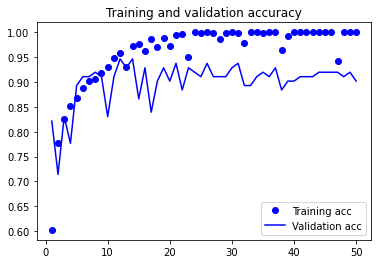

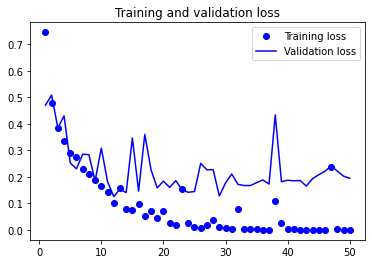

In [20]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Save the model as a file
models.save_model(model, model_filename)

In [22]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

6
7
9
13
14
15
16
19
20
21
23
25
27
30
31
32
33
36
37
42
44
46
47
52
53
54
55
60
61
63
64
70
72
74
75
79
82
84
90
91
99
102
106
110
111


In [23]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(0, 50):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 0.0  Prediction: [[3.1381405e-05]]
Answer: 0.0  Prediction: [[2.4070794e-15]]
Answer: 0.0  Prediction: [[0.00169036]]
Answer: 0.0  Prediction: [[0.16118473]]
Answer: 0.0  Prediction: [[0.00056092]]
Answer: 0.0  Prediction: [[8.748862e-09]]
Answer: 1.0  Prediction: [[0.99998796]]
Answer: 1.0  Prediction: [[0.99822694]]
Answer: 0.0  Prediction: [[0.9720916]]
Answer: 1.0  Prediction: [[0.99978]]
Answer: 0.0  Prediction: [[1.5361546e-13]]
Answer: 0.0  Prediction: [[0.00329864]]
Answer: 0.0  Prediction: [[7.7341996e-12]]
Answer: 1.0  Prediction: [[0.99995244]]
Answer: 1.0  Prediction: [[0.9798759]]
Answer: 1.0  Prediction: [[0.92396986]]
Answer: 1.0  Prediction: [[0.94069105]]
Answer: 0.0  Prediction: [[1.7319797e-05]]
Answer: 0.0  Prediction: [[1.152915e-06]]
Answer: 1.0  Prediction: [[0.9999994]]
Answer: 1.0  Prediction: [[0.99948657]]
Answer: 1.0  Prediction: [[0.97584426]]
Answer: 0.0  Prediction: [[1.8348717e-06]]
Answer: 1.0  Prediction: [[0.98156977]]
Answer: 0.0  Prediction:

In [24]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

4/4 [==============================] - 0s 29ms/step - loss: 0.2109 - acc: 0.9286


[0.2108524739742279, 0.9285714030265808]